## Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).


## Задачи

1. Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).


2. Нарисуйте график распределения показов на объявление за весь период.


3. Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?


4. Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 


5. Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.


6. Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))


7. Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков – [0, 30, 90, 180, 365]

## Описание данных


ads_data.csv – данные взаимодействий с рекламными объявлениями

- date – дата
- time – время
- event – действие (просмотр/клик)
- platform – платформа
- ad_id – id объявления
- client_union_id – id рекламного кабинета
- campaign_union_id – id рекламной кампании
- ad_cost_type – тип оплаты
- ad_cost – цена
- has_video – есть ли видео
- target_audience_count – размер аудитории


ads_clients_data.csv – характеристики рекламных клиентов

- date – дата
- client_union_id – id рекламного кабинета
- community_id – id сообщества
- create_date – дата создания рекламного клиента

____

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [5]:
adv_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/6/ads_data.csv',
                       parse_dates=['date', 'time'])

adv_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [6]:
adv_data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [7]:
adv_data.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

In [9]:
client_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv',
                          parse_dates=['date', 'create_date'])
client_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [10]:
client_data.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [11]:
client_data.isna().sum()

date               0
client_union_id    0
community_id       0
create_date        0
dtype: int64

____

## Задание 1

Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [13]:
# сгруппируем по обьявления по id и типу события и посчитаем количество
event_count = adv_data.groupby(['ad_id','event'], as_index=False).size()
event_count

,ad_id,event,size
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [17]:
# так как есть объявления с отсутвием кликов, сделаем сводную таблицу и значения без кликов заменим 0
pivot_event_count = event_count.pivot(index='ad_id', columns='event', values='size')
pivot_event_count = pivot_event_count.fillna(0)
pivot_event_count

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [19]:
# считаем среднее и округляем
round(pivot_event_count.mean())

event
click    113.0
view     923.0
dtype: float64

В среднем 113 кликов и 923 показа

____

## Задание 2

Нарисуйте график распределения показов на объявление за весь период.

In [24]:
# посчитаем для каждого объявления количесво показов и перед тем как строить гистограмму пролгорифмируем полученный результат

log_views = np.log(adv_data.loc[adv_data.event=='view'].ad_id.value_counts())
log_views

112583    12.770824
107729    12.125925
107837    10.858922
28142     10.092122
45008      9.886748
            ...    
106809     2.564949
45969      2.564949
112872     2.397895
42507      2.397895
98274      2.302585
Name: ad_id, Length: 956, dtype: float64

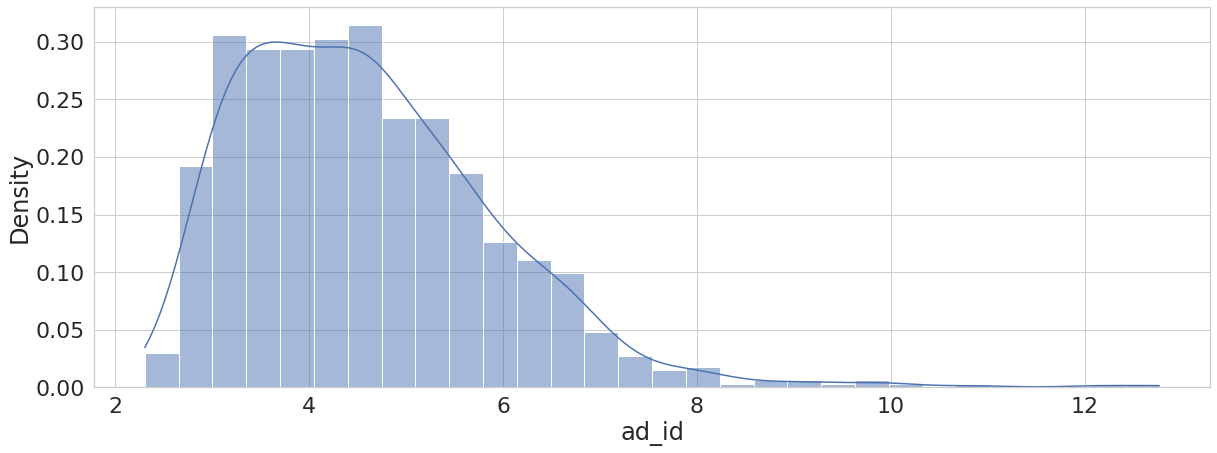

In [26]:
sns.histplot(data = log_views, kde=True, stat = 'density')

____

## Задание 3

Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

In [28]:
#  предварительно посчитаем количесво показов каждого объявления по дням 
daily_ad_views = adv_data.loc[adv_data.event == 'view'].pivot_table(index='ad_id',
                                                                    columns='date',
                                                                    values='time',
                                                                    aggfunc='count')
daily_ad_views

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [29]:
# считеам среднее количество объявлений показаных за каждый день
mean_daily_views = daily_ad_views.mean()
mean_daily_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [30]:
# считаем скользящее среднее с окном 2 
rolling_daily = daily_ad_views.mean()\
                              .rolling(window=2)\
                              .mean()\
                              .round(0)
rolling_daily

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [31]:
rolling_daily['2019-04-06']

598.0

6 апреля 2019 года скользящее среднее равно 598

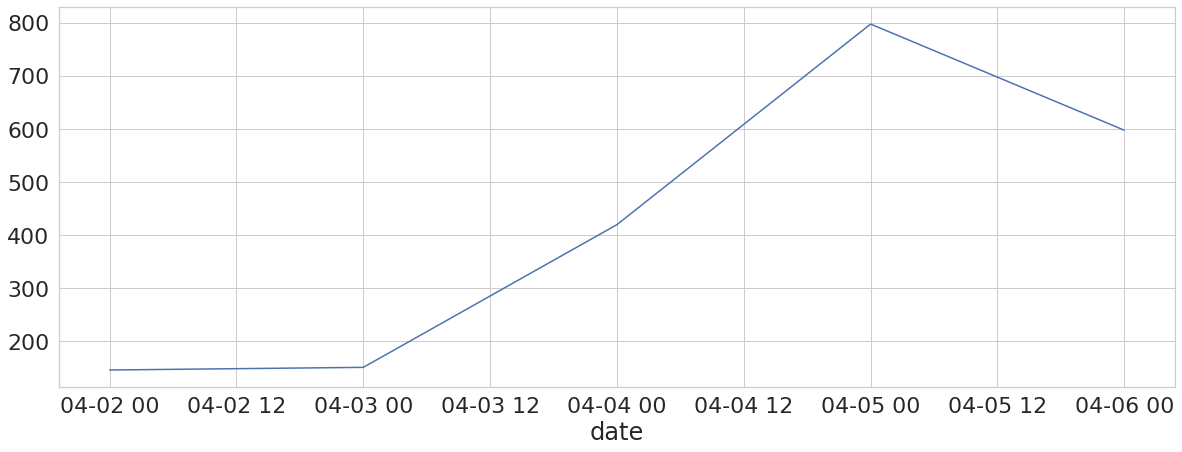

In [32]:
sns.lineplot(data=rolling_daily)

____

## Задание 4

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем.

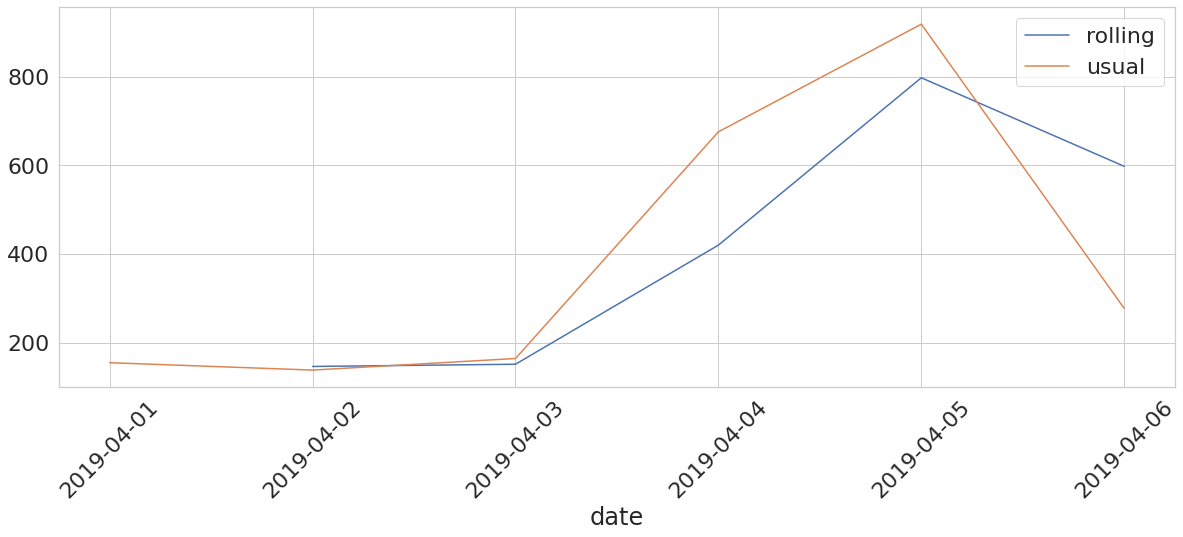

In [33]:
fig, ax = plt.subplots()
sns.lineplot(data = rolling_daily, ax=ax, label = 'rolling')
sns.lineplot(data = mean_daily_views, ax=ax, label = 'usual')
ax.tick_params(axis='x', rotation=45)
plt.legend()

Максимальная разница наблюдается 6 апреля 2019 года.

____

## Задание 5

Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [34]:
# Объединим данные 
merged = adv_data.merge(client_data, on = 'client_union_id', suffixes = ('_ad', '_client'))
merged.head()

,date_ad,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_client,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [35]:
# посчитаем разницу в днях между созданием аккаунта и датой публикации рекламы 
merged['delay'] =  merged['date_ad'] - merged['create_date']
merged.head()

,date_ad,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_client,community_id,create_date,delay
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days


In [36]:
# сгруппируем по клиентам и выведем минимальное значение разницы 
first_adv = merged.groupby('client_union_id').delay.min()
first_adv

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: delay, Length: 838, dtype: timedelta64[ns]

In [38]:
# выводим среднее кол-во дней прошедших с момента создания аккаунта до публикации 1-го объявления

first_adv.mean().days

124

124 дня в среднем, проходит с момента создания аккаунта до первой публикации

____

## Задание 6

Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

In [41]:
# создадим трэшхолд котрый равен 365 дням 
threshold = pd.Timedelta(365, unit='day')

In [44]:
# вычислияем тех у кого ушло менее 365 дней до создания 1го объявления 
first_adv_365 = first_adv.loc[first_adv < threshold]
first_adv_365

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: delay, Length: 838, dtype: timedelta64[ns]

In [48]:
np.round(len(first_adv_365) / client_data.client_union_id.nunique() * 100, 2)

0.69

менее 1% создают рекламное объявление менее чем за год

_____

## Задание 7

Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков – [0, 30, 90, 180, 365]

In [54]:
# задаем промежутки 
bins = [0, 30, 90, 180, 365]

In [57]:
#так как наши промежутки это таймдельта то сделаем необходимые преобразования

bins = [pd.Timedelta(x, 'd') for x in bins]
bins

[Timedelta('0 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('180 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

In [58]:
labels = ['0-30', '30-90', '90-180', '180-365']

In [59]:
binned_adv = pd.cut(first_adv, bins, labels=labels)

In [60]:
binned_adv.value_counts()

90-180     396
30-90      263
180-365    168
0-30        11
Name: delay, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


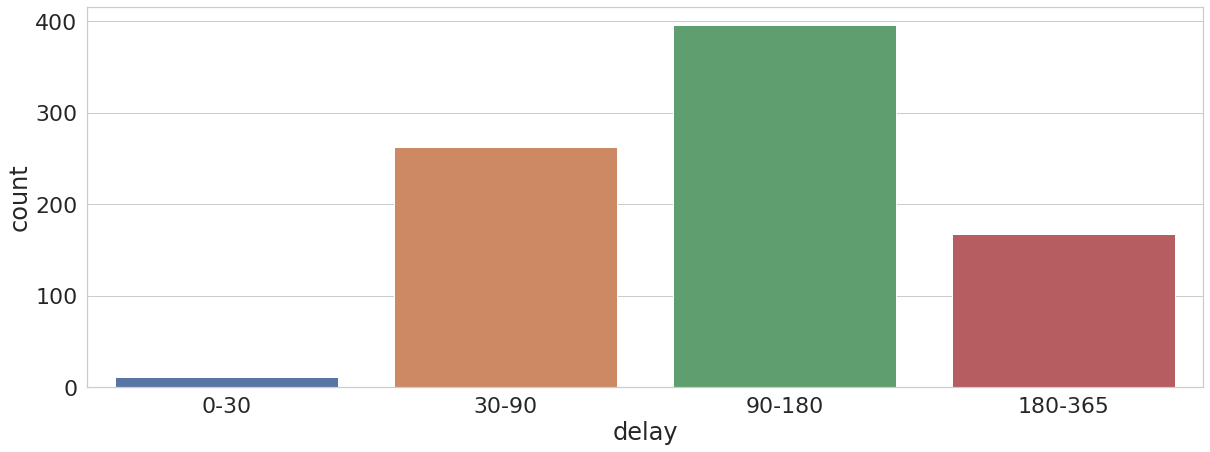

In [63]:
sns.countplot(binned_adv)

В певый месяц свое объявление опубликовали 11 клиентов 